# Hierarchical Clustering

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
dataset = pd.read_csv('../../data_sets/mall.csv')

In [5]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Create a dendrogram

Solving the same problem as clustering file, but with hierarchical approach.

In [6]:
import scipy.cluster.hierarchy as sch

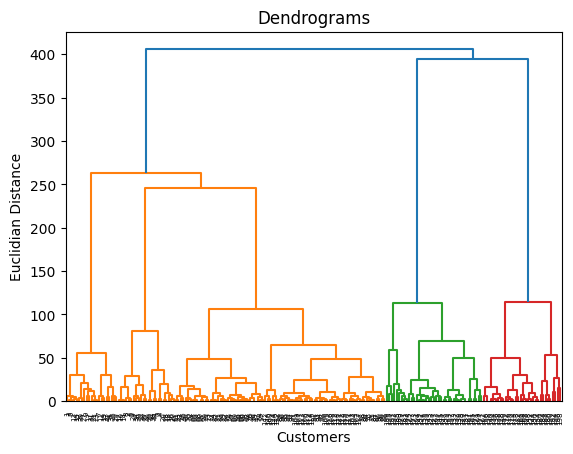

In [8]:
X = dataset.iloc[:,[3,4]].values

dendogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrograms')
plt.xlabel('Customers')
plt.ylabel('Euclidian Distance')
plt.show()


In [9]:
len(dataset)

200

This dendrogram shows potentially 4 clusters. This is figured out by drawing horizontal lines extending from each node through each vertical tree node. If it disects another vertical line, then this is not a cluster. Then count the vertical lines that have no disection lines. Take the LONGEST LINE that has no disection and draw a disection through the middle of that. The number of vertical lines that disects is the number of K clusters.

Then re-draw the cluster diagram now with 4 instead of using the Elbow Method.

## Agglomerative Clustering

In [10]:
from sklearn.cluster import AgglomerativeClustering

In [12]:
hc = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

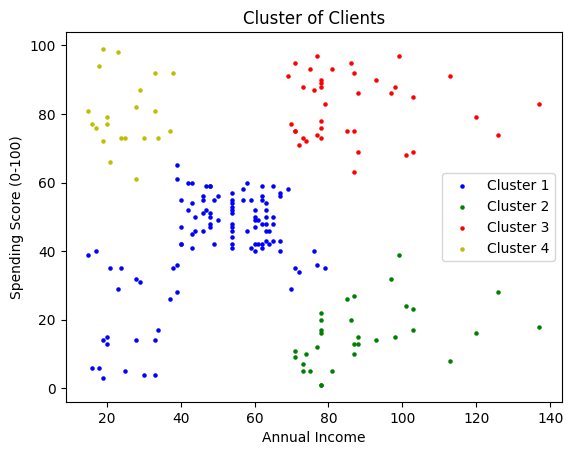

In [13]:
# Visualizing the clusters

colors = [
    'b',  # blue
    'g',  # green
    'r',  # red
    # 'c',  # cyan
    # 'm',  # magenta
    'y',  # yellow
]

# kmeans = KMeans(n_clusters=len(colors))
# y_kmeans = kmeans.fit_predict(X)

for i, color in enumerate(colors):
    plt.scatter(
        X[y_hc == i, 0],
        X[y_hc == i, 1],
        s=5,
        c=color,
        label=f'Cluster {i+1}'
    )

# Centroids
# plt.scatter(
#     kmeans.cluster_centers_[:, 0],
#     kmeans.cluster_centers_[:, 1],
#     s=40,
#     c='black',
#     label='Centroids'
# )

plt.title('Cluster of Clients')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score (0-100)')
plt.legend()
plt.show()



## Analysis

Compare the graphs and see, maybe 4 clusters makes sense, maybe 5 does. Also, check to see whether some of the datapoints are assigned to one cluster in one model, but then a different cluster in another model. Then make an educated decision as to which model is the best, which number of clusters is the best, and where those extraneous datapoints belong.